In [77]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as skl
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 

# Prédiction des variables 'SiteEnergyUse(kBtu)' et 'TotalGHGEmissions'

In [78]:
df = pd.read_csv('building-energy-benchmarking_final_features.csv',sep=',')
df = df.drop(df.columns[[0]], axis=1) 
df.dropna(inplace = True)
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1411 entries, 0 to 2051
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              1411 non-null   int64  
 1   DataYear                   1411 non-null   int64  
 2   BuildingType               1411 non-null   int64  
 3   PrimaryPropertyType        1411 non-null   int64  
 4   YearBuilt                  1411 non-null   int64  
 5   NumberofBuildings          1411 non-null   float64
 6   NumberofFloors             1411 non-null   float64
 7   PropertyGFATotal           1411 non-null   int64  
 8   PropertyGFAParking         1411 non-null   int64  
 9   PropertyGFABuilding(s)     1411 non-null   int64  
 10  LargestPropertyUseTypeGFA  1411 non-null   float64
 11  ENERGYSTARScore            1411 non-null   float64
 12  SiteEUI(kBtu/sf)           1411 non-null   float64
 13  SourceEUI(kBtu/sf)         1411 non-null   float

In [80]:
df1 = df.drop(df.columns[[0,12,13,15,16,17,19,20,21,22]],axis = 1)
# df = df.drop
# df.info(verbose = True)
df1.info(verbose = True)
df = df1.drop(df1.columns[10],axis = 1)
df.info(verbose = True)
#drop steamUse, site EUI, natural gas, site EUI, GHGEmissionsIntensity car relevés energitiques 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1411 entries, 0 to 2051
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   DataYear                   1411 non-null   int64  
 1   BuildingType               1411 non-null   int64  
 2   PrimaryPropertyType        1411 non-null   int64  
 3   YearBuilt                  1411 non-null   int64  
 4   NumberofBuildings          1411 non-null   float64
 5   NumberofFloors             1411 non-null   float64
 6   PropertyGFATotal           1411 non-null   int64  
 7   PropertyGFAParking         1411 non-null   int64  
 8   PropertyGFABuilding(s)     1411 non-null   int64  
 9   LargestPropertyUseTypeGFA  1411 non-null   float64
 10  ENERGYSTARScore            1411 non-null   float64
 11  SiteEnergyUse(kBtu)        1411 non-null   float64
 12  TotalGHGEmissions          1411 non-null   float64
dtypes: float64(6), int64(7)
memory usage: 154.3 KB
<

### Observation des densités des variables à prédire

Text(0.5, 1.0, 'distribution de la variable SiteEnergyUse(kBtu)')

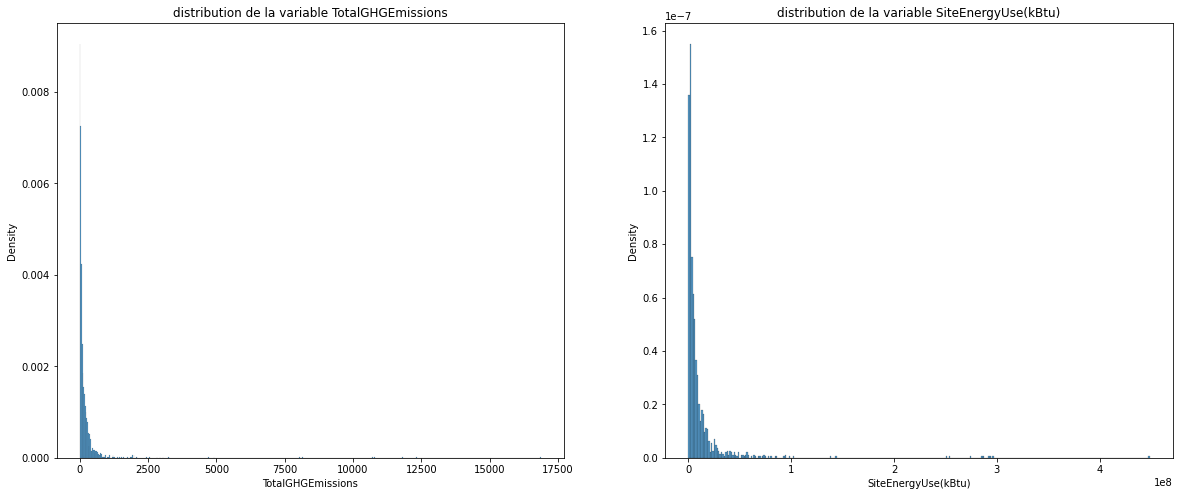

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))

sns.histplot(data=df, x='TotalGHGEmissions', stat="density",ax = axes[0])
sns.histplot(data=df, x='SiteEnergyUse(kBtu)', stat="density",ax =axes[1])
axes[0].set_title('distribution de la variable TotalGHGEmissions')
axes[1].set_title('distribution de la variable SiteEnergyUse(kBtu)')

#### On observe que les deux variables à prédire suivent une distribution exponentielle. 
On utilise la fonction inverse afin d'obtenir une distribution normale

In [5]:
from sklearn.preprocessing import FunctionTransformer

logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)


### Separation des données 

In [6]:
targets_columns = ['SiteEnergyUse(kBtu)','TotalGHGEmissions']
df_features = df.copy()
df_targets = df.copy()
df_features = df_features.drop(columns=['SiteEnergyUse(kBtu)', 'TotalGHGEmissions','ENERGYSTARScore'])
df_target_elec = df_targets['SiteEnergyUse(kBtu)']
df_target_CO2 = df_targets['TotalGHGEmissions']
df_target_CO2.head()

0     249.43
1     263.51
2    2061.48
3    1936.34
4     507.70
Name: TotalGHGEmissions, dtype: float64

### Standardisation des données

Text(0.5, 1.0, 'application de la fonction inverse sur la distribution de la variable SiteEnergyUse(kBtu)')

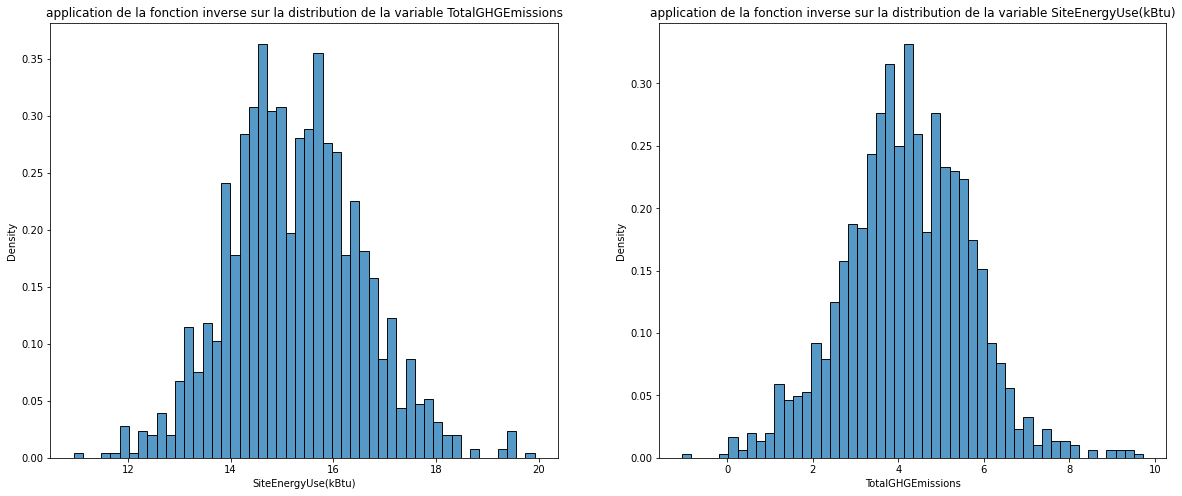

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_features = scaler.fit_transform(df_features)

target_e = logtransformer.transform(df_target_elec)
target_C = logtransformer.transform(df_target_CO2)

# df_features_tr = scaler.transform(df_features)

fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))

sns.histplot(data=target_e, stat="density",bins = 50,ax = axes[0])
sns.histplot(data=target_C, stat="density",bins = 50 ,ax =axes[1])
axes[0].set_title('application de la fonction inverse sur la distribution de la variable TotalGHGEmissions')
axes[1].set_title('application de la fonction inverse sur la distribution de la variable SiteEnergyUse(kBtu)')

### Creation des datasets 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import utils

(Xtrain_e,ytrain_e,Xtest_e,ytest_e) = train_test_split(df_features, target_e)
(Xtrain_g,ytrain_g,Xtest_g,ytest_g) = train_test_split(df_features, target_C)

lab_enc = preprocessing.LabelEncoder()
df_target_elec = lab_enc.fit_transform(target_e)
df_target_CO2 = lab_enc.fit_transform(target_C)

print(utils.multiclass.type_of_target(target_e))
print(utils.multiclass.type_of_target(target_e.astype('int')))
print(utils.multiclass.type_of_target(df_target_elec))

print(utils.multiclass.type_of_target(target_C))
print(utils.multiclass.type_of_target(target_C.astype('int')))
print(utils.multiclass.type_of_target(df_target_CO2))

continuous
multiclass
multiclass
continuous
multiclass
multiclass


# Prédictions sur les différents modèles

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn import linear_model
reg = linear_model.LinearRegression()

scores_elec1 = cross_validate(reg, df_features, df_target_elec, cv=5, scoring = ('r2','neg_mean_absolute_error'))
print('prediction en électricité avec le modèle linear regression : \n',scores_elec1)

scores_CO21 = cross_validate(reg, df_features, df_target_CO2, cv = 5,scoring = ('r2','neg_mean_absolute_error'))
print('prédiction en consomation de CO2 avec le modèle linear regression : \n', scores_CO21)

prediction en électricité avec le modèle linear regression : 
 {'fit_time': array([0.00129318, 0.00088644, 0.00172901, 0.00172877, 0.00174499]), 'score_time': array([0., 0., 0., 0., 0.]), 'test_r2': array([ 0.11145809,  0.27713871,  0.29513896,  0.00268849, -0.33920963]), 'test_neg_mean_absolute_error': array([-282.31015345, -274.65848096, -290.58643883, -292.82817907,
       -383.70829242])}
prédiction en consomation de CO2 avec le modèle linear regression : 
 {'fit_time': array([0.00136924, 0.00099993, 0.00099754, 0.0009985 , 0.0009892 ]), 'score_time': array([0.        , 0.00099707, 0.00103045, 0.        , 0.        ]), 'test_r2': array([ 0.00572546,  0.15216603,  0.1406464 ,  0.17509548, -0.21545121]), 'test_neg_mean_absolute_error': array([-302.52356822, -280.57354927, -328.94989907, -269.48061278,
       -353.60793132])}


### Cross validation sur le modèle linéaire SVR

In [10]:
from sklearn.svm import SVR

clf_svr = SVR()
scores_elec2 = cross_validate(clf_svr, df_features, df_target_elec, cv=5, scoring = ('r2','neg_mean_absolute_error'))
print('prediction en électricité avec le modèle SVR : \n',scores_elec2)

scores_CO22 = cross_validate(clf_svr, df_features, df_target_CO2, cv = 5,scoring = ('r2','neg_mean_absolute_error'))
print('prédiction en consomation de CO2 avec le modèle SVR : \n', scores_CO22)

prediction en électricité avec le modèle SVR : 
 {'fit_time': array([0.06881213, 0.06482601, 0.0628314 , 0.06382871, 0.06283236]), 'score_time': array([0.04587793, 0.04487967, 0.04388285, 0.04388285, 0.04188728]), 'test_r2': array([-0.2190447 ,  0.12848969,  0.12408275, -0.13217534, -0.71257573]), 'test_neg_mean_absolute_error': array([-337.32467202, -312.59385672, -326.22220805, -320.24212241,
       -439.34292337])}
prédiction en consomation de CO2 avec le modèle SVR : 
 {'fit_time': array([0.05988669, 0.05985188, 0.06479287, 0.0628314 , 0.0638299 ]), 'score_time': array([0.04189086, 0.04188967, 0.04288507, 0.04288459, 0.04288483]), 'test_r2': array([-0.23055314,  0.05008544,  0.07260375,  0.06417897, -0.42611514]), 'test_neg_mean_absolute_error': array([-347.29135767, -298.07038436, -348.68701972, -293.74009575,
       -383.12318246])}


### Cross validation modèle linéaire ElasticNet

In [11]:
from sklearn.linear_model import ElasticNet 

clf = ElasticNet()
scores_elec3 = cross_validate(clf, df_features, target_e, cv=5, scoring = ('r2','neg_mean_absolute_error'))
print('prediction en électricité avec le modèle ElasticNet : \n',scores_elec3)

scores_CO23 = cross_validate(clf, df_features, target_C, cv = 5,scoring = ('r2','neg_mean_absolute_error'))
print('prédiction en consomation de CO2 avec le modèle ElasticNet : \n', scores_CO23)

prediction en électricité avec le modèle ElasticNet : 
 {'fit_time': array([0.00299239, 0.00202894, 0.0019958 , 0.00224733, 0.00172424]), 'score_time': array([0.0010407 , 0.00096369, 0.        , 0.        , 0.        ]), 'test_r2': array([ 0.03478656,  0.23451922,  0.23049523,  0.08524734, -0.3264174 ]), 'test_neg_mean_absolute_error': array([-0.92021255, -0.8436692 , -0.9062505 , -0.86507508, -1.15947269])}
prédiction en consomation de CO2 avec le modèle ElasticNet : 
 {'fit_time': array([0.00170422, 0.00221205, 0.00099683, 0.00171041, 0.00141263]), 'score_time': array([0.00100207, 0.        , 0.00103235, 0.        , 0.        ]), 'test_r2': array([-0.08461819,  0.12783309,  0.12741298,  0.13662919, -0.21874349]), 'test_neg_mean_absolute_error': array([-1.10350654, -0.94343577, -1.1641109 , -0.88650455, -1.28071629])}


### Cross validation sur modèle non inéaire random forest

In [12]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor()

scores_elec4 = cross_validate(regr, df_features, df_target_elec, cv=5, scoring = ('r2','neg_mean_absolute_error'))
print('prediction en électricité avec le modèle RandomForest : \n',scores_elec4)

scores_CO24 = cross_validate(regr, df_features, df_target_CO2, cv = 5,scoring = ('r2','neg_mean_absolute_error'))
print('prédiction en consomation de CO2 avec le modèle RandomForest : \n', scores_CO24)

prediction en électricité avec le modèle RandomForest : 
 {'fit_time': array([0.42187285, 0.41292858, 0.4008925 , 0.3939476 , 0.40391874]), 'score_time': array([0.01196861, 0.01196933, 0.01097083, 0.01196837, 0.01196861]), 'test_r2': array([0.86137148, 0.73886203, 0.82874098, 0.79982793, 0.6489057 ]), 'test_neg_mean_absolute_error': array([ -85.99469965, -131.0912766 , -112.34198582, -105.17312057,
       -161.75092199])}
prédiction en consomation de CO2 avec le modèle RandomForest : 
 {'fit_time': array([0.3989315 , 0.3989327 , 0.3949759 , 0.39394307, 0.40392089]), 'score_time': array([0.01097107, 0.01097083, 0.01196909, 0.01097083, 0.01096845]), 'test_r2': array([0.77486182, 0.56496861, 0.71889995, 0.63538601, 0.47534349]), 'test_neg_mean_absolute_error': array([-125.72144876, -174.74794326, -164.73953901, -164.05351064,
       -203.85971631])}


### Cross validation sur le modèle XGBoost 

In [13]:
from sklearn.ensemble import GradientBoostingRegressor

reg = GradientBoostingRegressor()

scores_elec5 = cross_validate(reg, df_features, df_target_elec, cv=5, scoring = ('r2','neg_mean_absolute_error'))
print('prediction en électricité avec le modèle XGBoost : \n',scores_elec5)

scores_CO25 = cross_validate(reg, df_features, df_target_CO2, cv = 5,scoring = ('r2','neg_mean_absolute_error'))
print('prédiction en consomation de CO2 avec le modèle XGBoost : \n', scores_CO25)

prediction en électricité avec le modèle XGBoost : 
 {'fit_time': array([0.14563727, 0.14063787, 0.14063954, 0.13763261, 0.133641  ]), 'score_time': array([0.00100112, 0.00098252, 0.00098085, 0.00100327, 0.0009973 ]), 'test_r2': array([0.71487143, 0.59920192, 0.76229737, 0.6122404 , 0.58604071]), 'test_neg_mean_absolute_error': array([-136.11307498, -171.94998876, -143.30671683, -159.97154224,
       -177.01852536])}
prédiction en consomation de CO2 avec le modèle XGBoost : 
 {'fit_time': array([0.13862681, 0.14364028, 0.14161897, 0.14161682, 0.13762856]), 'score_time': array([0.0009973 , 0.00097775, 0.00099635, 0.00099611, 0.00099707]), 'test_r2': array([0.534981  , 0.33523991, 0.55518303, 0.42574891, 0.35777408]), 'test_neg_mean_absolute_error': array([-197.32541801, -233.06108726, -220.71550836, -216.77181544,
       -240.82602317])}


# Comparaison différents modèles  

In [14]:
#Création Dataframe des résultats


labels = ['linear regression','SVR','ElasticNet','RandomForestRegressor','XGBoostRegressor']


fit_time_e = [np.mean(scores_elec1['fit_time']),np.mean(scores_elec2['fit_time']),np.mean(scores_elec3['fit_time']),np.mean(scores_elec4['fit_time']),np.mean(scores_elec5['fit_time'])]
r2_e = [np.mean(scores_elec1['test_r2']),np.mean(scores_elec2['test_r2']),np.mean(scores_elec3['test_r2']),np.mean(scores_elec4['test_r2']),np.mean(scores_elec5['test_r2'])]
mae_e = [np.mean(scores_elec1['test_neg_mean_absolute_error']),np.mean(scores_elec2['test_neg_mean_absolute_error']),np.mean(scores_elec3['test_neg_mean_absolute_error']),np.mean(scores_elec4['test_neg_mean_absolute_error']),np.mean(scores_elec5['test_neg_mean_absolute_error'])]

fit_time_C = np.transpose([np.mean(scores_CO21['fit_time']),np.mean(scores_CO22['fit_time']),np.mean(scores_CO23['fit_time']),np.mean(scores_CO24['fit_time']),np.mean(scores_CO25['fit_time'])])
r2_C = np.transpose([np.mean(scores_CO21['test_r2']),np.mean(scores_CO22['test_r2']),np.mean(scores_CO23['test_r2']),np.mean(scores_CO24['test_r2']),np.mean(scores_CO25['test_r2'])])
mae_C = np.transpose([np.mean(scores_CO21['test_neg_mean_absolute_error']),np.mean(scores_CO22['test_neg_mean_absolute_error']),np.mean(scores_CO23['test_neg_mean_absolute_error']),np.mean(scores_CO24['test_neg_mean_absolute_error']),np.mean(scores_CO25['test_neg_mean_absolute_error'])])

d_fit_time = np.concatenate([labels,fit_time_e,fit_time_C])
d_fit_time = np.reshape(d_fit_time,(3,5))

d_r2 = np.concatenate([labels,r2_e,r2_C])
d_r2 = np.reshape(d_r2,(3,5))

d_mae = np.concatenate((labels,mae_e,mae_C),axis=0)
d_mae = np.reshape(d_mae,(3,5))

elec = np.array([labels,fit_time_e,r2_e,mae_e])
elec = np.transpose(elec)

df_res_e = pd.DataFrame(elec,columns = ['name','fit_time','r2','mae'])
df_res_e['fit_time'] = pd.to_numeric(df_res_e['fit_time'])
df_res_e['r2'] = pd.to_numeric(df_res_e['r2'])
df_res_e['mae'] = pd.to_numeric(df_res_e['mae'])

CO2 = np.array([labels,fit_time_C,r2_C,mae_C])
CO2 = np.transpose(CO2)

df_res_C = pd.DataFrame(CO2,columns = ['name','fit_time','r2','mae'])
df_res_C['fit_time'] = pd.to_numeric(df_res_C['fit_time'])
df_res_C['r2'] = pd.to_numeric(df_res_C['r2'])
df_res_C['mae'] = pd.to_numeric(df_res_C['mae'])




Text(0.5, 1.0, 'MAE pour la prédiction de la variable TotalGHGEmissions')

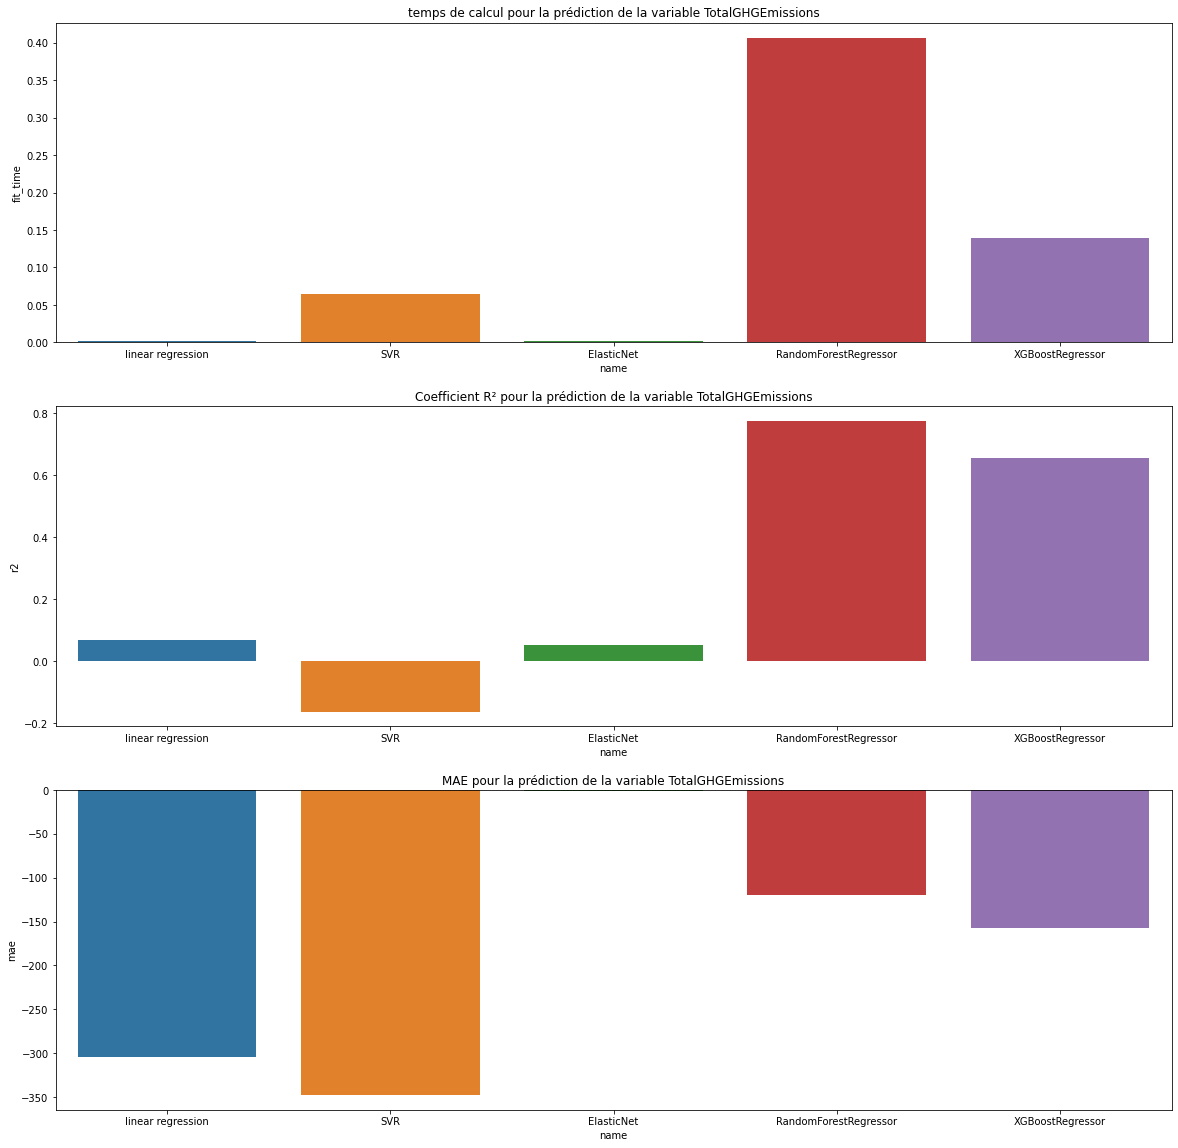

In [15]:
#Visualisation des différents modèles pour la variable TotalGHGEmissions

fig, axes = plt.subplots(nrows=3, ncols=1, sharex=False, sharey=False, figsize=(20,20))

sns.barplot(data=df_res_e, x="name", y="fit_time",ax =axes[0])
sns.barplot(data=df_res_e, x="name", y="r2",ax =axes[1])
sns.barplot(data=df_res_e, x="name", y="mae",ax =axes[2])


axes[0].set_title('temps de calcul pour la prédiction de la variable TotalGHGEmissions')
axes[1].set_title('Coefficient R² pour la prédiction de la variable TotalGHGEmissions')
axes[2].set_title('MAE pour la prédiction de la variable TotalGHGEmissions')

Text(0.5, 1.0, 'MAE pour la prédiction de la variable SiteEnergyUse(kBtu)')

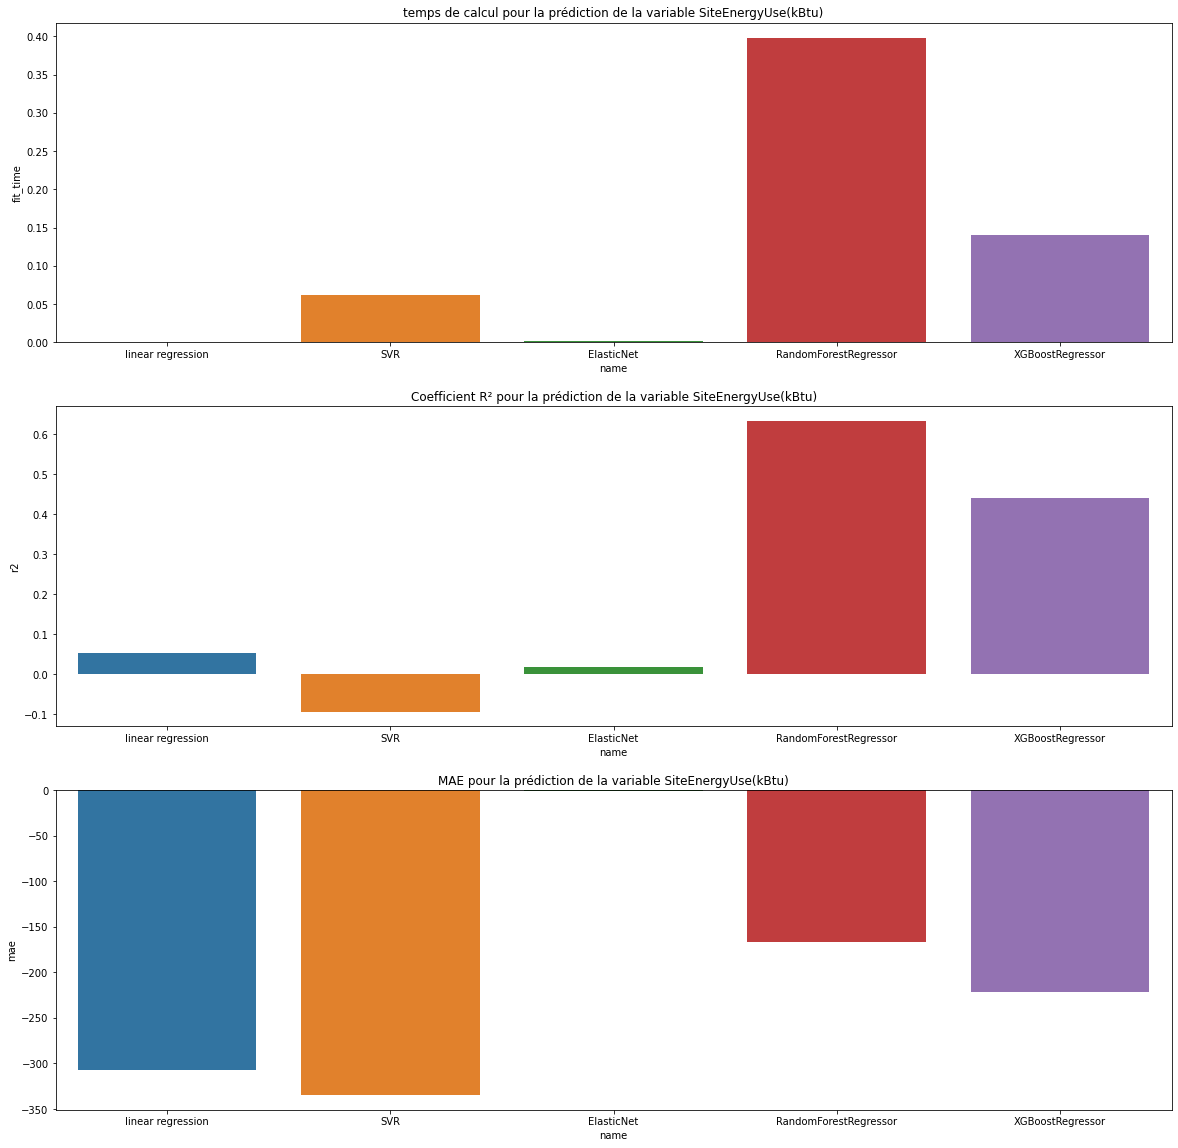

In [16]:
#Visualisation des différents modèles pour la variable SiteEnergyUse(kBtu)

fig, axes = plt.subplots(nrows=3, ncols=1, sharex=False, sharey=False, figsize=(20,20))

sns.barplot(data=df_res_C, x="name", y="fit_time",ax =axes[0])
sns.barplot(data=df_res_C, x="name", y="r2",ax =axes[1])
sns.barplot(data=df_res_C, x="name", y="mae",ax =axes[2])


axes[0].set_title('temps de calcul pour la prédiction de la variable SiteEnergyUse(kBtu)')
axes[1].set_title('Coefficient R² pour la prédiction de la variable SiteEnergyUse(kBtu)')
axes[2].set_title('MAE pour la prédiction de la variable SiteEnergyUse(kBtu)')

# Tuning hyperparamètres sur le modèle SVR, XGBoostRegressor et RandomForestRegressor retenus

### Serching for best hyperparams

In [17]:
from sklearn.model_selection import RandomizedSearchCV


xgbr = SVR(kernel = 'poly')

X,y = df_features, df_target_elec
params = {'degree' : [3,5],
          'coef0' : [0.0,0.1,0.5],
         }

clf = clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=6,
                         verbose=1)
clf.fit(df,y)
print("Best parameters for SVR model:", clf.best_params_)
print("Lowest RMSE for SVR model: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for SVR model: {'degree': 3, 'coef0': 0.0}
Lowest RMSE for SVR model:  433.9477480604129


In [18]:
#Tuning hyperparameters on XGBoost model

X, y = df_features,df_target_elec

params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'alpha': [0.1, 0.2, 0.5, 0.9],
           'n_estimators': [100, 500, 1000],
           'learning_rate': [0.1,0.2,0.5]
         }
xgbr = GradientBoostingRegressor()

clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)
clf.fit(df, y)
print("Best parameters for XGBoostRegressor model:", clf.best_params_)
print("Lowest RMSE for XGBoostRegressor model : ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters for XGBoostRegressor model: {'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.1, 'alpha': 0.9}
Lowest RMSE for XGBoostRegressor model :  1.1970266893705475


In [22]:
#Tuning hyperparameters for RandomForestRegressor model

X, y = df_features,df_target_elec

params = {'n_estimators' : [100,150,200],
          'min_samples_split': [2,3,5],
          'min_samples_leaf' : [1,2,4]
         }

xgbr = RandomForestRegressor()

clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)
clf.fit(df, y)
print("Best parameters for RandomForestRegressor model:", clf.best_params_)
print("Lowest RMSE for RandomForestRegressor model : ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 25 candidates, totalling 125 fits
Best parameters for RandomForestRegressor model: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2}
Lowest RMSE for RandomForestRegressor model :  1.4855672431672267


### Comparaison des 3 modèles après tuning d'hyperparamètres

In [24]:
svr = SVR()
scores_svr = cross_validate(svr, df_features, df_target_elec, cv=5, scoring = ('r2','neg_mean_absolute_error'))
print('prediction en électricité avec le modèle SVR : \n',scores_svr)

RDF = RandomForestRegressor(n_estimators= 200, min_samples_split= 2, min_samples_leaf= 2)
scores_RDF = cross_validate(RDF, df_features, df_target_elec, cv=5, scoring = ('r2','neg_mean_absolute_error'))
print('prediction en électricité avec le modèle RandomForest : \n',scores_RDF)

XGBoost = GradientBoostingRegressor(n_estimators = 100, max_depth = 6, learning_rate = 0.1, alpha = 0.9)

scores_XGBoost = cross_validate(reg, df_features, df_target_elec, cv=5, scoring = ('r2','neg_mean_absolute_error'))
print('prediction en électricité avec le modèle XGBoost : \n',scores_XGBoost)

prediction en électricité avec le modèle SVR : 
 {'fit_time': array([0.05962372, 0.04707885, 0.05312324, 0.05008364, 0.05006385]), 'score_time': array([0.03790021, 0.037956  , 0.03705049, 0.03803945, 0.05201435]), 'test_r2': array([-0.2190447 ,  0.12848969,  0.12408275, -0.13217534, -0.71257573]), 'test_neg_mean_absolute_error': array([-337.32467202, -312.59385672, -326.22220805, -320.24212241,
       -439.34292337])}
prediction en électricité avec le modèle RandomForest : 
 {'fit_time': array([0.56602478, 0.60903072, 0.60642147, 0.53960443, 0.56184173]), 'score_time': array([0.01598692, 0.02717328, 0.0159502 , 0.01795769, 0.01499701]), 'test_r2': array([0.83646009, 0.69703158, 0.82113583, 0.75466485, 0.65027363]), 'test_neg_mean_absolute_error': array([ -95.47974119, -144.26513855, -119.14996805, -118.14213597,
       -155.17243336])}
prediction en électricité avec le modèle XGBoost : 
 {'fit_time': array([0.11600733, 0.12287951, 0.1156497 , 0.11269855, 0.11181045]), 'score_time': arr

# Visualisation des modèles après tuning

                    name  fit_time        r2         mae
0                    SVR  0.051995  0.162245 -347.145157
1  RandomForestRegressor  0.576585  0.751913 -126.441883
2       XGBoostRegressor  0.115809  0.654859 -157.656943


Text(0.5, 1.0, 'MAE pour la prédiction de la variable SiteEnergyUse(kBtu) après tuning hyperamètres')

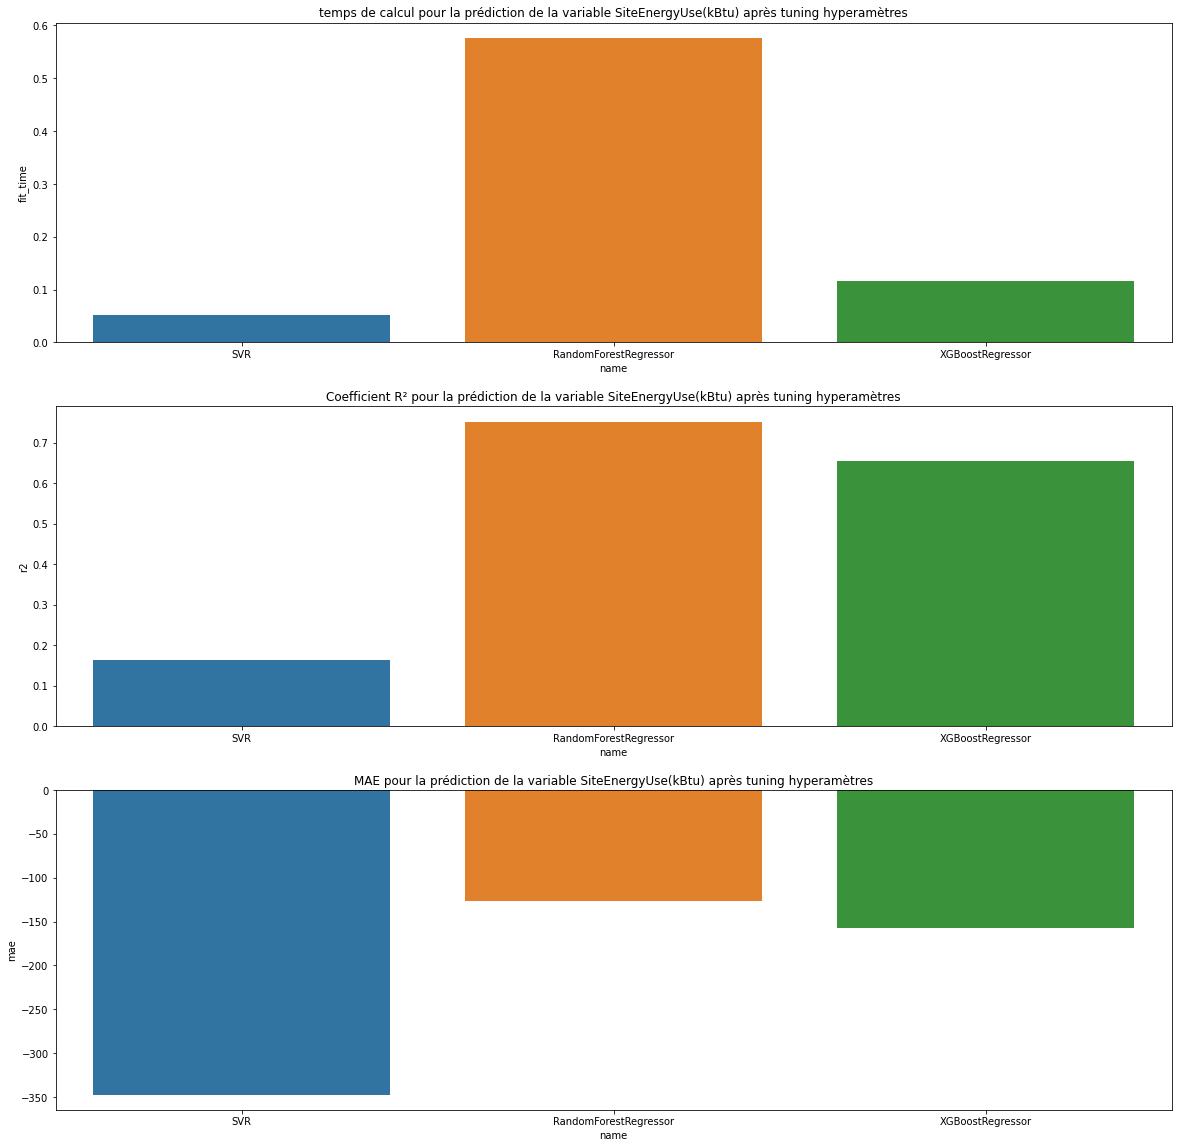

In [76]:
labels = ['SVR','RandomForestRegressor','XGBoostRegressor']

col = ['name','fit_time','r2','mae']
fit_time_e = [np.mean(scores_svr['fit_time']),np.mean(scores_RDF['fit_time']),np.mean(scores_XGBoost['fit_time'])]
# print(fit_time_e)
r2_e = np.abs([np.mean(scores_svr['test_r2']),np.mean(scores_RDF['test_r2']),np.mean(scores_XGBoost['test_r2'])])
# print(r2_e)
mae_e = [np.mean(scores_svr['test_neg_mean_absolute_error']),np.mean(scores_RDF['test_neg_mean_absolute_error']),np.mean(scores_XGBoost['test_neg_mean_absolute_error'])]
# print(mae_e)
t = np.concatenate((labels,fit_time_e,r2_e,mae_e))
t = t.reshape((4,3))
t = np.transpose(t)
# t = np.abs(t[:,1:3])
# print(t)
# print(np.shape(t))

df = pd.DataFrame(t, columns = col) #,index = ['name','SVR','RandomForestRegressor','XGBoostRegressor'])
df['fit_time'] = pd.to_numeric(df['fit_time'])
df['r2'] = pd.to_numeric(df['r2'])
df['mae'] = pd.to_numeric(df['mae'])
print(df.head())

fig, axes = plt.subplots(nrows=3, ncols=1, sharex=False, sharey=False, figsize=(20,20))

sns.barplot(data=df, x='name', y="fit_time",ax =axes[0])
sns.barplot(data=df, x="name", y="r2",ax =axes[1])
sns.barplot(data=df, x="name", y="mae",ax =axes[2])


axes[0].set_title('temps de calcul pour la prédiction de la variable SiteEnergyUse(kBtu) après tuning hyperamètres')
axes[1].set_title('Coefficient R² pour la prédiction de la variable SiteEnergyUse(kBtu) après tuning hyperamètres')
axes[2].set_title('MAE pour la prédiction de la variable SiteEnergyUse(kBtu) après tuning hyperamètres')

# Visualisation du feature energy star score sur le modèle random forest selectionné

In [ ]:
RDF = RandomForestRegressor(n_estimators= 200, min_samples_split= 2, min_samples_leaf= 2)
scores_RDF = cross_validate(RDF, df_features, df_target_elec, cv=5, scoring = ('r2','neg_mean_absolute_error'))
print('prediction en électricité avec le modèle RandomForest avec energy star score : \n',scores_RDF)

df1_features = df1.copy()
df1_features = df1_features.drop(columns=['SiteEnergyUse(kBtu)', 'TotalGHGEmissions','ENERGYSTARScore'])
df1_features = scaler.fit_transform(df1_features) 